## Linear regression on the Boston House Prices dataset

In this exercise, you will perform linear regression on the Boston House Prices dataset.

This dataset contains median house prices in different areas around Boston. For each area, we have some information about it, that we will use as our features. We want to train a linear regression model that predicts the price of a house given the input features.

We don't have direct access to the dataset from PyTorch, but the `scikit` library provides a version of it.

An important part of the exercise will be to get used to process input dataset and translate it into a suitable format for your analysis.

In [1]:
# Import dataset
from sklearn.datasets import load_boston
dataset = load_boston()

Play around with the `dataset` variable to see what it contains. It is a *dictionary*, i.e. a Python structure with key-value pairs, where the keys can be arbitrary objects --- usually strings. 

To access the item with key `key` from a dictionary `dictionary`, use the syntax `dictionary[key]`.

The `keys()` method of a dictionary returns the set of keys. To start, try `print()`ing the contents of the the `DESCR` key.

The data in the dataset are Numpy arrays. To convert them to PyTorch tensors, just pass the array as the single argument of the `torch.tensor()` function.

From this point, prepare the data to process it as done in the previous exercise.



---
#Test del dataset
---





In [2]:
for element in dataset:
  print("Chiave: {0}, Valore: {1}".format(element,dataset[element]))

Chiave: data, Valore: [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Chiave: target, Valore: [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27

In [3]:
import numpy as np
import torch
converted_data = torch.from_numpy(dataset["data"])
converted_target = torch.from_numpy(dataset["target"])
feature_names = dataset["feature_names"]

print(converted_data)
print("CONVERTED DATA TENSOR INFO --- DATA TYPE: {0} --- SHAPE: {1} --- SIZE: {2}".format(converted_data.dtype, converted_data.shape, converted_data.size()))
print(converted_target)
print("CONVERTED TARGET TENSOR INFO --- DATA TYPE: {0} --- SHAPE: {1} --- SIZE: {2}".format(converted_target.dtype, converted_target.shape, converted_target.size()))


tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00,  ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00,  ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00,  ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]], dtype=torch.float64)
CONVERTED DATA TENSOR INFO --- DATA TYPE: torch.float64 --- SHAPE: torch.Size([506, 13]) --- SIZE: torch.Size([506, 13])
tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000, 28.7000, 22.9000, 27.1000,
        16.5000, 18.9000, 15.0000, 18.9000, 21.7000, 20.4000, 18.2000, 19.9000,
        23.1000, 17.5000, 20.2000, 18.2000, 13.6000, 19.6000, 15.2000, 14.5000,
        15.6000, 13.90

'\n#Making converted target a column vector\nconverted_target = converted_target.unsqueeze(1)\nprint(converted_target.size())\ndata_ext = torch.cat([converted_data, converted_target], 1)\nprint(data_ext)\nprint("DATASET INFO --- DATA TYPE: {0} --- SIZE: {1}".format(data_ext.dtype, data_ext.shape))\n'

## Feature analysis

### Correlations

One of the things you may want to do is remove unnecessary features. For example, if you have two highly-correlated features, you could use only one of them.

Feature correlation can be estimated using the Pearson correlation coefficient:

$$\text{corr}_{X_1,X_2} = \frac{\text{cov}(X_1,X_2)}{\sigma_{X_1} \sigma_{X_2}}$$

where $\text{cov}(X_1,X_2)$ is the covariance between features $X_1$ and $X_2$ (i.e., all values for that feature, from all observations), and $\sigma_X$ is the standard deviation of feature $X$.

All values $X_i$ are basically the columns of our data matrix. Given the vector `X_i` that contains all values for a feature, you can use the `X_i.std()` function to get the standard deviation of that vector.

You can also use the variant of `std()` that takes an input `dim` argument to compute *all* standard deviations for each column in the full data matrix.

To compute the covariance matrix, you are going to need to perform some computations. This is a good training exercise to learn how to manipulate tensors, while will be very useful later.

Let's suppose your data matrix is `X`, where each row is an observation and each column is a feature.

First of all, you will need to compute a vector `X_mean`, where each element is the mean value for each feature. To do this, you will need to use the `torch.mean()` or the `Tensor.mean()` function.

From there, you have to subtract the mean vector to each observation in the data matrix. Note that PyTorch supports an operation called *broadcasting*. In practice, if `X` has size $n \times d$, and if `X_mean` has size $d$ or $1 \times d$, then `X - X_mean` will automatically subtract `X_mean` from each row in `X`.

Finally, if $N$ is the number of observation and `X_cent` is the data matrix where the mean vector has been subtracted, you can compute the covariance matrix $\Sigma$ as:

$$\Sigma = \frac{X_{\text{cent}}^T X_{\text{cent}}}{N-1}$$

Each element $\Sigma_{ij}$ is going to be equal to $\text{cov}(X_i,X_j)$. From those values and from the $\sigma_i$ values, you can compute the correlation matrix.

Once you have a correlation matrix `corr`, you can visualize it using the following code.

In [4]:
# Import
from matplotlib import pyplot as plt
import torch

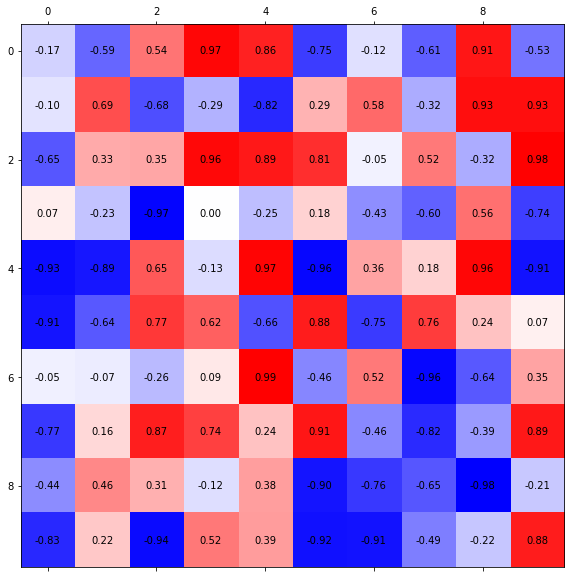

In [5]:
# Create random correlation matrix
corr = torch.rand(10, 10)*2 - 1
# Plot matrix
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.matshow(corr, cmap=plt.cm.bwr)
for i in range(corr.size(0)):
    for j in range(corr.size(1)):
        c = f"{corr[i,j].item():.2f}"
        ax.text(j, i, str(c), va='center', ha='center')

An additional test you can carry out is to see which feature mostly correlate *with the targets*, to see which features are most important for regression.

**Note that you should do this on the training set only. You can't look at the test set during training.**

To do so, you can create an "extended" data matrix `data_ext` where the targets have been added as a new feature column. Then you can run the correlation analysis to see which features are mostly related.

Finally, run some tests by:

- Computing the accuracy of your model when you remove/keep features that correlate with each other.
- Computing the accuracy of your model when you remove/keep features that correlate with the targets.

---
# Funzioni di utilità

Al seguito una serie di funzioni utili allo svolgimento dell'esercizio

---

In [10]:
#Compute correlation matrix
from matplotlib import pyplot as plt
import math

def correlation_matrix_calculus(dataset):
  #STEP1: Obtain X_mean
  X_mean = torch.mean(dataset, 0)
  #STEP2: Subtract the mean vector to each observation in the data matrix
  X_cent = dataset - X_mean
  #STEP3: Compute covariance matrix
  X_cov = (X_cent.t() @ X_cent)/(dataset.size(0) - 1) 
  #STEP4: Compute correlation matrix
  std_mat = torch.std(dataset, 0)
  X_corr = X_cov.clone().detach() 
  for i in range(dataset.size(1)):
    for j in range(dataset.size(1)):
      X_corr[i,j] =  X_cov[i,j]/(std_mat[i] * std_mat[j])
  return X_corr

def make_correlation_graph(corr_matrix):
  #STEP5: Plot matrix
  plt.figure(figsize=(corr_matrix.size(0), corr_matrix.size(1)))
  ax = plt.gca()
  ax.matshow(corr_matrix, cmap=plt.cm.bwr)
  for i in range(corr_matrix.size(0)):
      for j in range(corr_matrix.size(1)):
          c = f"{corr_matrix[i,j].item():.2f}"
          ax.text(j, i, str(c), va='center', ha='center')

def plot_data(dataset, target, label_name, color_name, plot_type):
  if plot_type == "scatter":
      plt.scatter(dataset, target, label=label_name, color=color_name)
  elif plot_type == "plot":
      plt.plot(dataset, target, label=label_name, color=color_name)

def show_data():
  plt.legend()
  plt.show()

def train_test_generate(train_ratio, dataset, target, features, plotting):
  num_train = math.floor(dataset.size(0)*train_ratio)
  num_test = dataset.size(0) - num_train
  print("Num. training samples: {0}".format(num_train))
  print("Num. test samples: {0}".format(num_test))
  X_train = dataset[:num_train,:]
  y_train = target[:num_train,:]
  X_test = dataset[num_train:,:]
  y_test = target[num_train:,:]
  # Plotting
  if plotting:
    for i in range(dataset.size(1)):
      if (i != 0):
        # Plot train data
        plot_data(X_train[:,i], y_train, "train: " + features[i-1], "blue", "scatter")
        # Plot test data
        plot_data(X_test[:,i], y_test, "test: " + features[i-1], "orange", "scatter")
        show_data()
  return X_train, X_test, y_train, y_test

def estimated_theta_calculus(dataset, target):
  theta_est = (dataset.t() @ dataset).inverse() @ dataset.t() @ target
  print("Estimated theta values: {0}".format(theta_est))
  return theta_est

def mse_calculus(dataset, target, theta, label):
  mse = ((target - dataset @ theta)**2).sum()/math.floor(dataset.size(0))
  print("{0} MSE: {1}".format(label,mse.item()))
  return mse

def mae_calculus(dataset, target, theta, label):
  mae = (target - dataset @ theta).abs().sum()/math.floor(dataset.size(0))
  print("{0} MAE: {1}".format(label,mae.item()))
  return mae

def linear_regression(dataset, target, train_ratio, features, plotting):
    # Compute number of training samples
    X_train, X_test, y_train, y_test = train_test_generate(train_ratio, dataset, target, features, plotting)
    # Estimated theta
    theta_est = estimated_theta_calculus(X_train, y_train)
    # Compute MSE
    train_mse = mse_calculus(X_train, y_train, theta_est, "Train")
    test_mse = mse_calculus(X_test, y_test, theta_est, "Test")
    # Compute MAE
    train_mae = mae_calculus(X_train, y_train, theta_est, "Train")
    test_mae = mae_calculus(X_test, y_test, theta_est, "Test")
    # Prediction plotting
    est_y = X_test @ theta_est
    est_train_y = X_train @ theta_est
    if plotting:
      for i in range(dataset.size(1)):
        if (i != 0):
          plot_data(X_train[:,i], y_train, "train: " + features[i-1], "blue", "scatter")
          plot_data(X_test[:,i], y_test, "test: " + features[i-1], "orange", "scatter")
          plot_data(X_test[:,i], y_test, "real: " + features[i-1], "green", "plot")
          plot_data(X_test[:,i], est_y, "estimated: " + features[i-1], "red", "plot")
          show_data()
    print("Error extimation")
    plot_data(y_test, est_y, "test", "red", "scatter")
    plot_data(y_train, est_train_y, "train", "blue", "scatter")
    plot_data([0,50], [0,50], "zero_error", "green", "plot" )
    show_data()
    print("Test error extimation")
    plot_data(y_test, est_y, "test", "red", "scatter")
    plot_data([0,50], [0,50], "zero_error", "green", "plot" )
    show_data()
    print("Train error extimation")
    plot_data(y_train, est_train_y, "train", "blue", "scatter")
    plot_data([0,50], [0,50], "zero_error", "green", "plot" )
    show_data()





---
# Scenario d'esecuzione
---

torch.Size([506, 1])
torch.Size([506])
DATASET INFO --- DATA TYPE: torch.float64 --- SIZE: torch.Size([506, 14])


---- FIRST TEST: 0.8 RATIO ----
Num. training samples: 404
Num. test samples: 102
Estimated theta values: tensor([[ 3.0077e+01],
        [-2.0214e-01],
        [ 4.4128e-02],
        [ 5.2674e-02],
        [ 1.8847e+00],
        [-1.4928e+01],
        [ 4.7604e+00],
        [ 2.8873e-03],
        [-1.3003e+00],
        [ 4.6166e-01],
        [-1.5543e-02],
        [-8.1163e-01],
        [-1.9717e-03],
        [-5.3227e-01]], dtype=torch.float64)
Train MSE: 22.77837952180079
Test MSE: 32.79986268019396
Train MAE: 3.3105184155361957
Test MAE: 4.730017250959911
Error extimation


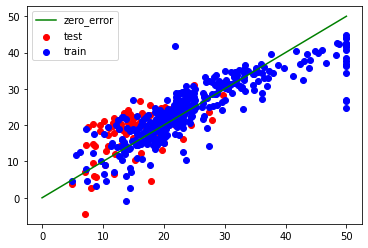

Test error extimation


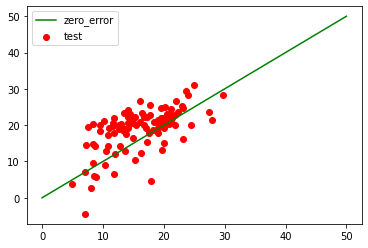

Train error extimation


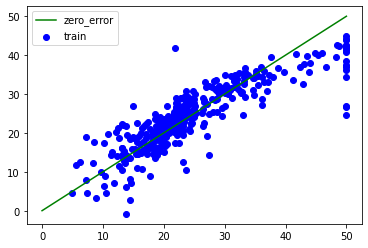



---- FIRST TEST: 0.9 RATIO ----
Num. training samples: 455
Num. test samples: 51
Estimated theta values: tensor([[ 3.5546e+01],
        [-1.0657e-01],
        [ 4.9103e-02],
        [ 3.2119e-02],
        [ 2.5088e+00],
        [-1.7583e+01],
        [ 3.8228e+00],
        [ 1.0514e-02],
        [-1.4344e+00],
        [ 3.6235e-01],
        [-1.5483e-02],
        [-9.1136e-01],
        [ 9.7134e-03],
        [-5.5504e-01]], dtype=torch.float64)
Train MSE: 23.23352045060155
Test MSE: 10.80620138107768
Train MAE: 3.388263894571845
Test MAE: 2.5202094160014523
Error extimation


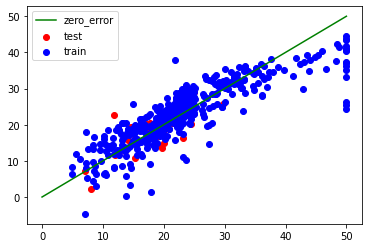

Test error extimation


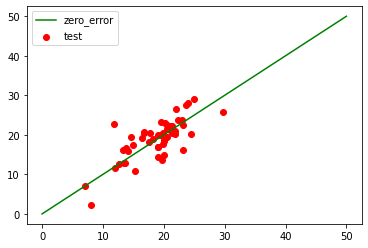

Train error extimation


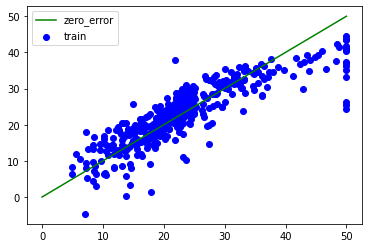

Num. training samples: 404
Num. test samples: 102
DATASET INFO --- DATA TYPE: torch.float64 --- SIZE: torch.Size([506, 14])


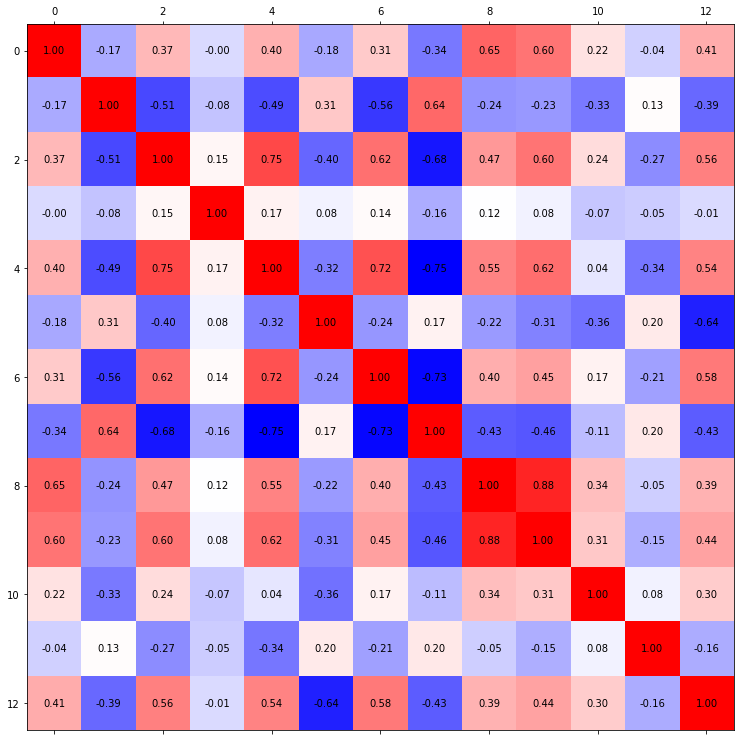

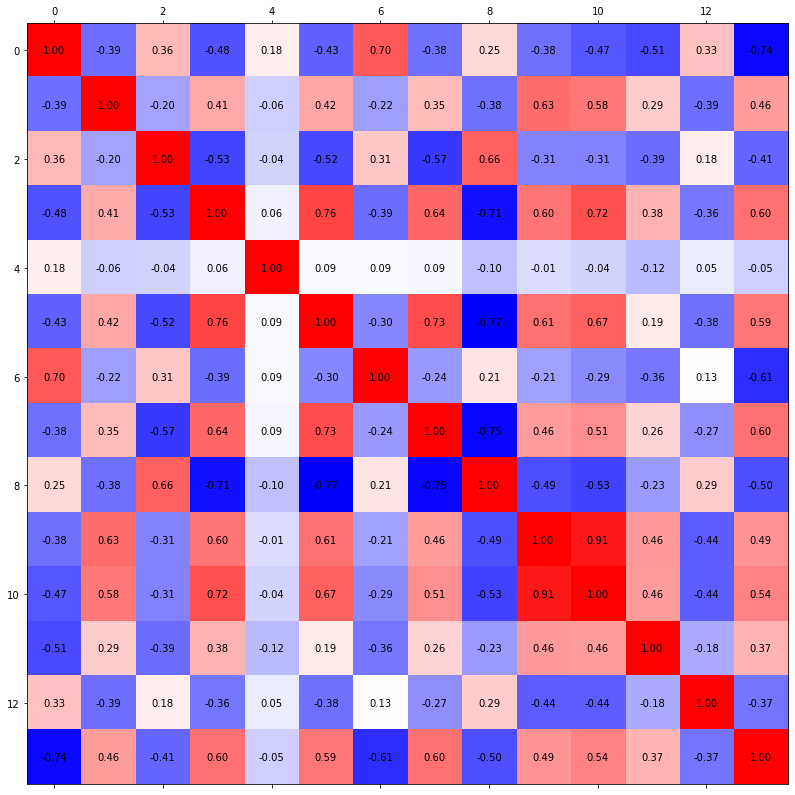

In [34]:
#Exe
#Remember: 
#converted_data = torch.from_numpy(dataset["data"])
#converted_target = torch.from_numpy(dataset["target"]) --- this one has been unsqueezed

#Add x0 to X
x0 = torch.ones(506 , 1)
print(x0.size())
X = torch.cat([x0, converted_data], 1)
#Making converted target a column vector
y = converted_target.unsqueeze(1)
print(converted_target.size())
print("DATASET INFO --- DATA TYPE: {0} --- SIZE: {1}".format(X.dtype, X.shape))

#TEST 1: standard dataset, 0.8 split ratio
print()
print()
print("---- FIRST TEST: 0.8 RATIO ----")
linear_regression(X, y, 0.8, feature_names, 0)

#TEST 2: standard dataset, 0.9 split ratio
print()
print()
print("---- FIRST TEST: 0.9 RATIO ----")
linear_regression(X, y, 0.9, feature_names, 0)

#Obtain train and test tensors just to play with those structures
X_train, X_test, y_train, y_test = train_test_generate(0.8, converted_data, y, feature_names, 0)
correlation_matrix = correlation_matrix_calculus(X_train)
make_correlation_graph(correlation_matrix)

data_ext = torch.cat((y,converted_data), 1)
print("DATASET INFO --- DATA TYPE: {0} --- SIZE: {1}".format(data_ext.dtype, data_ext.shape))
correlation_matrix = correlation_matrix_calculus(data_ext)
make_correlation_graph(correlation_matrix)




---
# Analsi dei risultati

In quanto le features a nostra disposizione sono ben 13, e sapendo che le uscite sono frutto di più features, partendo dal dataset completo eseguire un plotting una singola feature non fornisce un grafico con un qualche contenuto informativo.

Per tale motivo si è preferito eseguire il plotting delle stime d'errore, in modo da poter comprendere la qualità della regressione lineare sulla base delle features considerate.

Supponendo un'assenza di shuffling dei valori all'interno del dataset (e quindi con il possibile rischio che colui che ha creato tale dataset abbia inserito i dati con un ordinamento ben preciso), dall'analisi eseguita si è potuto osservare che:
- **Rate di splitting 0.8:** con tale rate di splitting si ottiene un errore pressochè accettabile (data la forte ipotesi effettuata), e le uscite predette sembrano seguire senza troppe differenze i valori di training.
- **Rate di splitting 0.7:** con tale rate di splitting si ha un errore elevato, e le uscite predette sono decisamente differenti rispetto ai valori di training.

A questo punto si è eseguita un'analisi della matrice di correlazione, costruendola seguendo due punti di vista differenti:
- **Uscite come feature:** in tal caso hanno le uscite del dataset nella prima colonna della matrice di correlazione, motivo per cui i valori contenuti nella prima riga di tale matrice indicano l'impatto delle altre fetures sulle uscite in questione.
Se il valore assoluto degli elementi della prima riga sarà elevato, la feature corrispondente alla posizione dell'elemento in questione sarà rilevante nel calcolo dell'uscita, motivo per cui sarà conveniente mantenere tale feature.
- **Assenza delle uscite:** in tal caso si hanno solo le feature standard del dataset, motivo per cui le features che presentano valori assoluti di correlazione elevati indicano che entrambe forniscono una informazione pressochè equivalente, e quindi una delle due features in questione dovrà essere rimossa.

Sulla base di quanto espresso sopra sembra conveniente:
- **Secondo la correlazione con il target** mantenere solo tre features, ovvero la feature 5(NOX), la feature 10(TAX) e la feature 12(LSTAT).
- **Secondo la correlazione tra features** rimuovere le features 4(CHAS), 7(AGE) e 9(RAD)

---



---- FIRST TEST: TARGET CORRELATION ----
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 4])
---- 0.8 SPLIT RATIO TEST ----
Num. training samples: 404
Num. test samples: 102
Estimated theta values: tensor([[ 6.9230],
        [ 5.6657],
        [-0.7182],
        [-0.5004]], dtype=torch.float64)
Train MSE: 28.04051013034543
Test MSE: 26.98607965649754
Train MAE: 3.547825564538233
Test MAE: 4.237794645617601
Error extimation


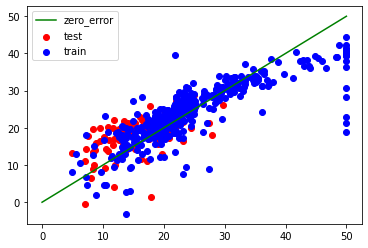

Test error extimation


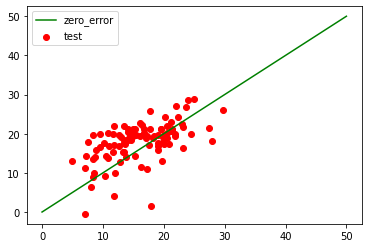

Train error extimation


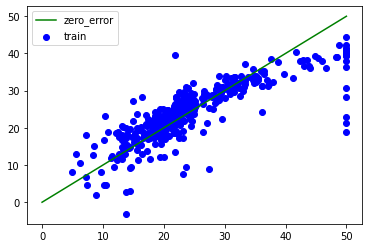


---- 0.9 SPLIT RATIO TEST ----
Num. training samples: 455
Num. test samples: 51
Estimated theta values: tensor([[17.1309],
        [ 4.6387],
        [-0.8908],
        [-0.5767]], dtype=torch.float64)
Train MSE: 29.046654892576328
Test MSE: 10.158936214989103
Train MAE: 3.765899082466266
Test MAE: 2.5515575497398224
Error extimation


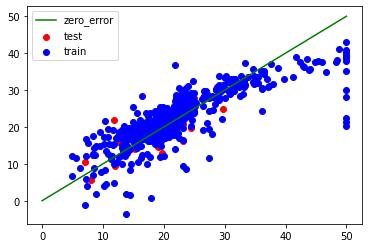

Test error extimation


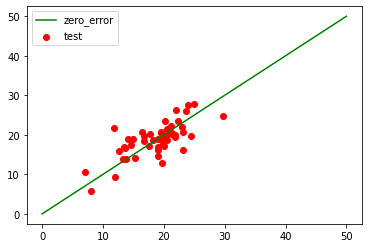

Train error extimation


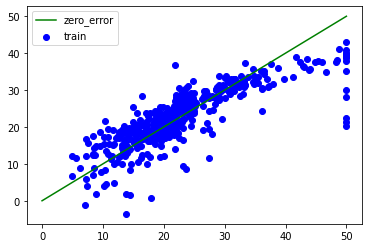



---- SECOND TEST: FEATURES CORRELATION ----
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 1])
torch.Size([506, 11])
---- 0.8 SPLIT RATIO TEST ----
Num. training samples: 404
Num. test samples: 102
Estimated theta values: tensor([[ 6.3346e+00],
        [-1.8540e-01],
        [ 1.6051e-03],
        [ 8.5402e-03],
        [ 2.2365e+00],
        [ 5.4427e+00],
        [ 1.5505e-02],
        [ 2.0341e-01],
        [-8.1217e-01],
        [ 5.0332e-03],
        [-5.4804e-01]], dtype=torch.float64)
Train MSE: 26.023128604586656
Test MSE: 32.04839927564552
Train MAE: 3.480057168913516
Test MAE: 4.6946560795396195
Error extimation


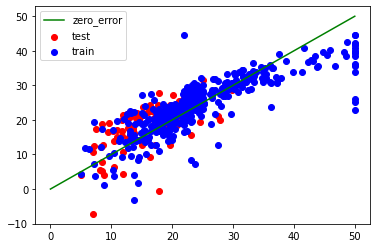

Test error extimation


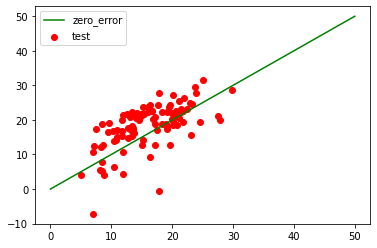

Train error extimation


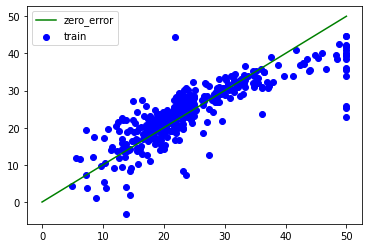


---- 0.9 SPLIT RATIO TEST ----
Num. training samples: 455
Num. test samples: 51
Estimated theta values: tensor([[ 1.2123e+01],
        [-7.8326e-02],
        [ 3.6779e-03],
        [-2.9046e-02],
        [ 2.8998e+00],
        [ 4.4819e+00],
        [ 2.1867e-02],
        [ 9.7166e-02],
        [-8.8660e-01],
        [ 1.0874e-02],
        [-5.7503e-01]], dtype=torch.float64)
Train MSE: 26.929032389991104
Test MSE: 10.69978075164102
Train MAE: 3.6099427225424314
Test MAE: 2.5507980684334015
Error extimation


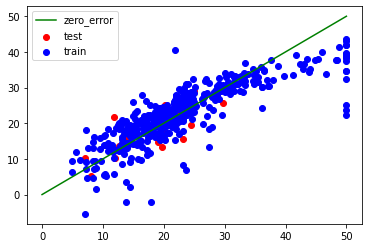

Test error extimation


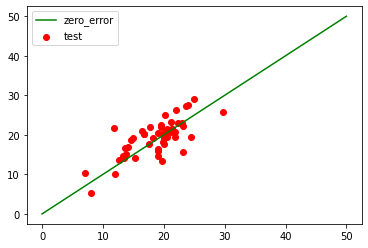

Train error extimation


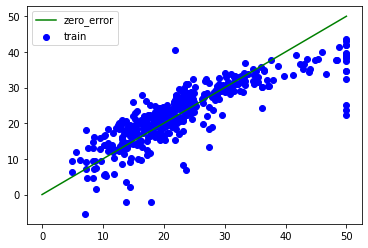

'\n# Removing unused features  \nnox_feature = converted_data[:,5]\nnox_feature = nox_feature.unsqueeze(1)\nprint(nox_feature.size())\nother_feature = converted_data[:,10]\nother_feature = other_feature.unsqueeze(1)\nprint(other_feature.size())\nlstat_feature = converted_data[:,12]\nlstat_feature = lstat_feature.unsqueeze(1)\nprint(lstat_feature.size())\nnew_dataset = torch.cat([nox_feature, lstat_feature], 1)\nnew_dataset = torch.cat([other_feature, new_dataset], 1)\nnew_dataset = torch.cat([x0, new_dataset], 1)\nprint(new_dataset.size())\n\n#TEST 1: 0.8 split ratio\nprint("---- 0.8 SPLIT RATIO TEST ----")\nlinear_regression(new_dataset, y, 0.8, feature_names, 0)\n#TEST 2: 0.9 split ratio\nprint()\nprint("---- 0.9 SPLIT RATIO TEST ----")\nlinear_regression(new_dataset, y, 0.9, feature_names, 0)\n'

In [35]:
def create_dataset(feature_numbers, dataset):
  columns = list()
  new_dataset = torch.ones(dataset.size(0) , 1)
  print(new_dataset.size())
  for element in feature_numbers:
    elem_to_append = dataset[:,element]
    elem_to_append = elem_to_append.unsqueeze(1)
    columns.append(elem_to_append)
  for feature in columns:
    print(feature.size())
    new_dataset = torch.cat([new_dataset, feature], 1)
  print(new_dataset.size())
  return new_dataset

print()
print()
print("---- FIRST TEST: TARGET CORRELATION ----")
dataset_to_use = create_dataset([5,10,12], converted_data)
print("---- 0.8 SPLIT RATIO TEST ----")
linear_regression(dataset_to_use, y, 0.8, feature_names, 0)
print()
print("---- 0.9 SPLIT RATIO TEST ----")
linear_regression(dataset_to_use, y, 0.9, feature_names, 0)

print()
print()
print("---- SECOND TEST: FEATURES CORRELATION ----")
dataset_to_use = create_dataset([0,1,2,3,5,6,8,10,11,12], converted_data)
print("---- 0.8 SPLIT RATIO TEST ----")
linear_regression(dataset_to_use, y, 0.8, feature_names, 0)
print()
print("---- 0.9 SPLIT RATIO TEST ----")
linear_regression(dataset_to_use, y, 0.9, feature_names, 0)
